# Agriculture Dataset Prediction:

1.Training Dataset

In [1]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the Dataset:
raw_data_csv = pd.read_excel('C:\\Users\\MI Laptop\\Downloads\\train_agriculture.xlsx')

In [3]:
type(raw_data_csv)

pandas.core.frame.DataFrame

In [18]:
raw_data_csv.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [19]:
#Taking a copy of main dataset:
df = raw_data_csv.copy()

In [20]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [21]:
#using Pd.options display max columns to check entire rows and columns in dataset.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [22]:
#Lets Check the shape of dataset:
df.shape

(4599, 10)

In [23]:
#Lets Check the info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [24]:
#Checking for categorical columns:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print("Categorical Columns:",cat_col)

Categorical Columns: ['ID']


In [25]:
#Dropping the Id Column:
df.drop(columns='ID',inplace=True,axis=1)

In [26]:
#checking the total columns:
columns = list(df.columns)
print(columns)

['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit', 'Season', 'Crop_Damage']


                         Total Missing Value
Estimated_Insects_Count                    0
Crop_Type                                  0
Soil_Type                                  0
Pesticide_Use_Category                     0
Number_Doses_Week                          0
Number_Weeks_Used                        442
Number_Weeks_Quit                          0
Season                                     0
Crop_Damage                                0


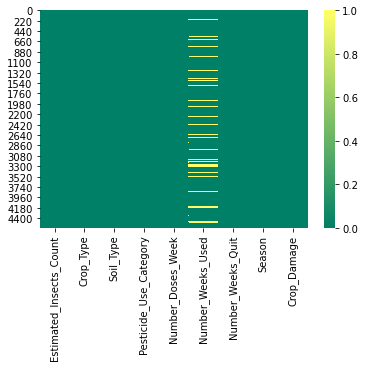

In [27]:
#Checking the null values in the dataset:
missing_value = pd.DataFrame(df.isnull().sum(),columns=['Total Missing Value'])
print(missing_value)
sns.heatmap(df.isnull(),cmap='summer')

In [28]:
#we will use simple imputer function from sklearn to remove null values:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
df['Number_Weeks_Used'] = imp.fit_transform(df['Number_Weeks_Used'].values.reshape(-1,1))

Are There Missing Data? : False


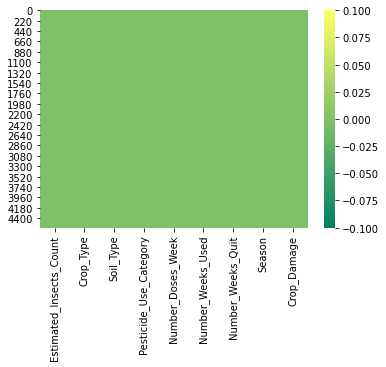

In [29]:
#Now again checking for missing values:
print("Are There Missing Data? :",df.isnull().any().any())
sns.heatmap(df.isnull(),cmap='summer')

In [17]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [18]:
#There is possibility of presence of outliers as mean of Estimated_Insects_Count is greater than median.
#Also theres a huge standard deviation in some feature which clearly indicate the presence of outliers.
#In some of features theres an huge difference between 75% and max which confirm the presence of outliers.

Exploratory Data Analysis

1.Univarite Analysis

2.Bivariate Analysis

3.Mulvariate Analysis

4.Here we check the relationship between different independant and dependant variable

Total crops alive:3820
Total crops damaged due to other causes:664
Total crops damaged due to pesticides:115


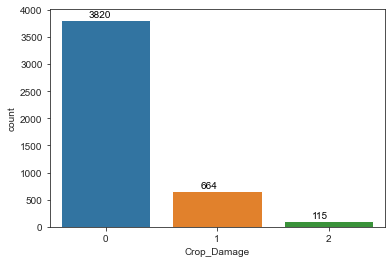

In [19]:
#Univariate Analysis:
#Checking Count of Target Varibale:
sns.set_style('ticks')
ax = sns.countplot(df['Crop_Damage'])
Alive, Damage_due_to_other_causes, Damage_due_to_pesticides = df['Crop_Damage'].value_counts()
print("Total crops alive:{}".format(Alive))
print("Total crops damaged due to other causes:{}".format(Damage_due_to_other_causes))
print("Total crops damaged due to pesticides:{}".format(Damage_due_to_pesticides))
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

0    3565
1    1034
Name: Crop_Type, dtype: int64


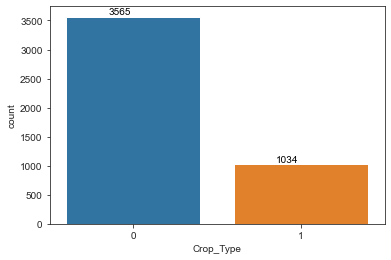

In [20]:
#Univariate Analysis:
#Checking Count of Crop Type:
sns.set_style('ticks')
ax = sns.countplot(df['Crop_Type'])
print(df['Crop_Type'].value_counts())
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

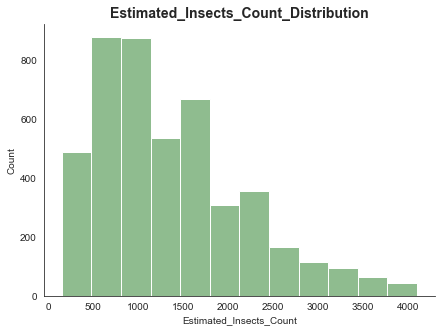

In [21]:
#Univariate Analysis:
#Checking Distribution of Estimated Insect Count:
sns.set_style("white")
plt.figure(figsize = (7, 5))
plt.hist(df["Estimated_Insects_Count"],bins = 12, color = "darkseagreen")
plt.title("Estimated_Insects_Count_Distribution", fontsize = 14, weight = "bold")
plt.xlabel("Estimated_Insects_Count")
plt.ylabel("Count")
sns.despine()
plt.show()

In [22]:
#We can see the data are somehow Positive Skewed.

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


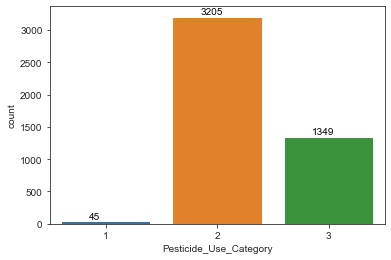

In [23]:
#Univariate Analysis:
#Checking Count of Pesticide_Use_Category:
sns.set_style('ticks')
ax = sns.countplot(df['Pesticide_Use_Category'])
print(df['Pesticide_Use_Category'].value_counts())
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

0    2407
1    2192
Name: Soil_Type, dtype: int64


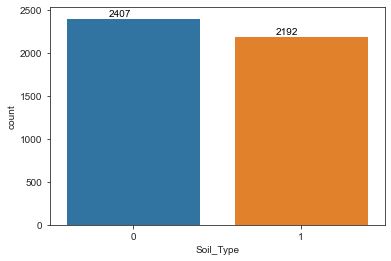

In [24]:
#Univariate Analysis:
#Checking Count of Soil_Type:
sns.set_style('ticks')
ax = sns.countplot(df['Soil_Type'])
print(df['Soil_Type'].value_counts())
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

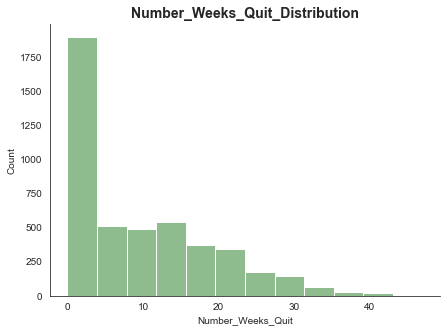

In [25]:
#Univariate Analysis:
#Checking Distribution of Number_Weeks_Quit:
sns.set_style("white")
plt.figure(figsize = (7, 5))
plt.hist(df["Number_Weeks_Quit"],bins = 12, color = "darkseagreen")
plt.title("Number_Weeks_Quit_Distribution", fontsize = 14, weight = "bold")
plt.xlabel("Number_Weeks_Quit")
plt.ylabel("Count")
sns.despine()
plt.show()

In [26]:
#We can see the data are somehow Positive Skewed.

2    2327
1    1379
3     893
Name: Season, dtype: int64


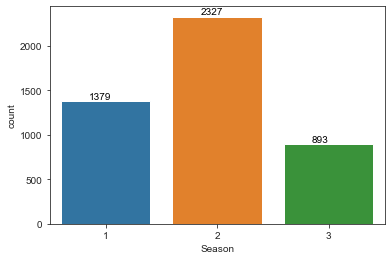

In [27]:
#Univariate Analysis:
#Checking Count of Season_Type:
sns.set_style('ticks')
ax = sns.countplot(df['Season'])
print(df['Season'].value_counts())
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

Crop_Damage,0,1,2
Estimated_Insects_Count,,,
150,0.941176,0.058824,0.0
151,1.000000,0.000000,0.0
168,0.846154,0.153846,0.0
169,1.000000,0.000000,0.0
188,0.958333,0.041667,0.0


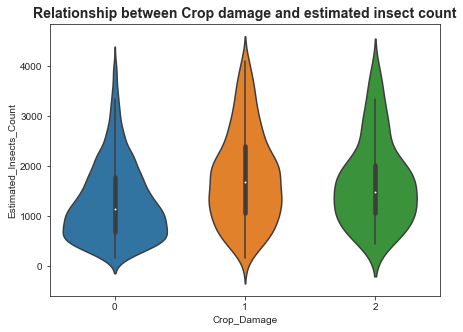

In [28]:
#Bivariate Analysis:
#Checking Relationship between Crop damage and estimated insect count:
plt.figure(figsize=(7,5))
sns.violinplot(x='Crop_Damage',y='Estimated_Insects_Count',data=df)
plt.xlabel('Crop_Damage')
plt.ylabel('Estimated_Insects_Count')
plt.title('Relationship between Crop damage and estimated insect count',fontsize = 14, weight = "bold")
pd.crosstab(index=df['Estimated_Insects_Count'],columns=df['Crop_Damage'],normalize='index').head()

Crop_Damage,0,1,2
Number_Weeks_Used,,,
0.0,0.150000,0.725000,0.125
5.0,0.939394,0.060606,0.000
6.0,0.950000,0.050000,0.000
7.0,0.818182,0.181818,0.000
8.0,0.923077,0.076923,0.000


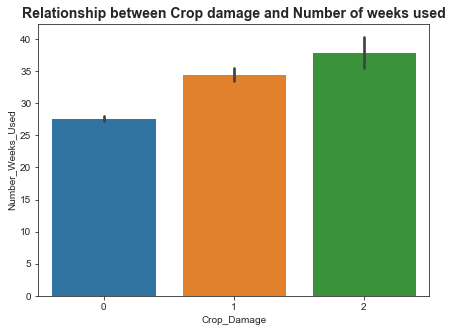

In [29]:
#Bivariate Analysis:
#Checking Relationship between Crop damage and Number_Weeks_Used:
plt.figure(figsize=(7,5))
sns.barplot(x='Crop_Damage',y='Number_Weeks_Used',data=df)
plt.xlabel('Crop_Damage')
plt.ylabel('Number_Weeks_Used')
plt.title('Relationship between Crop damage and Number of weeks used',fontsize = 14, weight = "bold")
pd.crosstab(index=df['Number_Weeks_Used'],columns=df['Crop_Damage'],normalize='index').head()

Total crops alive:3820
Total crops damaged due to other causes:664
Total crops damaged due to pesticides:115


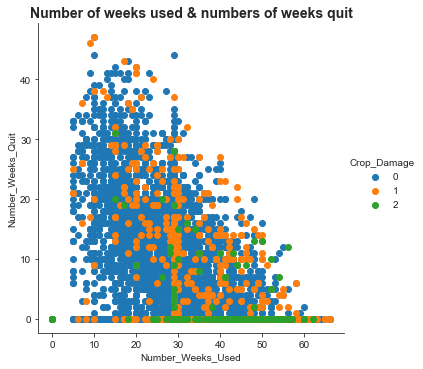

In [30]:
# Bivariate Analysis Linear regression with marginal distributions
# Checking the relation Bewtween Number of weeks used and numbers of weeks quit on target variable:
Alive, Damage_due_to_other_causes, Damage_due_to_pesticides = df['Crop_Damage'].value_counts()
print("Total crops alive:{}".format(Alive))
print("Total crops damaged due to other causes:{}".format(Damage_due_to_other_causes))
print("Total crops damaged due to pesticides:{}".format(Damage_due_to_pesticides))
sns.set_style("ticks");
sns.FacetGrid(df, hue="Crop_Damage",size=5).map(plt.scatter,"Number_Weeks_Used","Number_Weeks_Quit").add_legend()
plt.title("Number of weeks used & numbers of weeks quit",fontsize = 14, weight = "bold")
plt.xlabel('Number_Weeks_Used')
plt.ylabel('Number_Weeks_Quit')
plt.show();
#We can see that the these two variable are negatively corelated with each other hence their influence on target variable will be minimal.

In [31]:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.

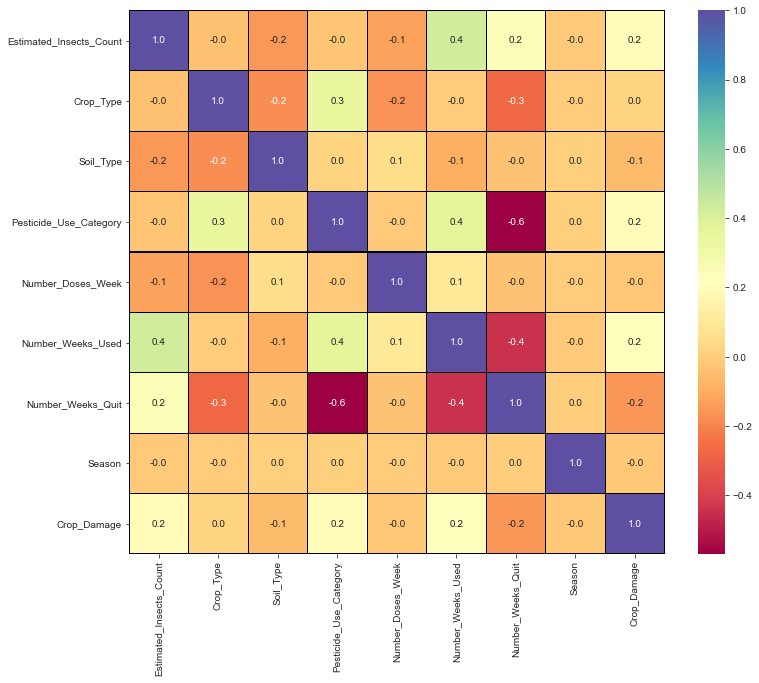

In [32]:
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

In [33]:
#We can see that area under ligther region are highly positively corelated and area under darker region are highly negatively corelated.

Text(0.5, 1.0, 'corelation with target variable')

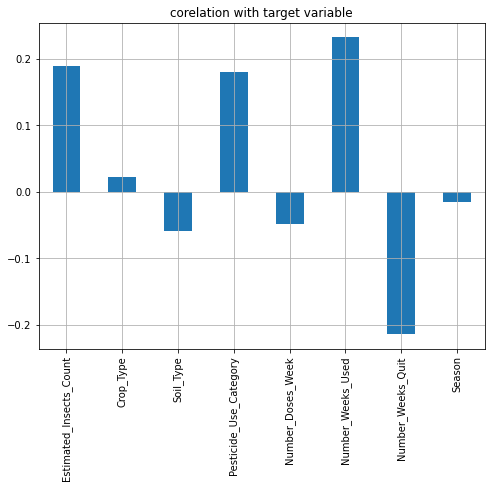

In [38]:
#corelation with target column:
plt.figure(figsize=(8,6))
df.drop('Crop_Damage',axis=1).corrwith(df['Crop_Damage']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('corelation with target variable')

In [14]:
#Checking Datatypes:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [30]:
#Let check wheather any outliers are present or not and if yes lets normalize them:
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.
from scipy.stats import zscore
zscore = abs(zscore(df))
print("Before removal of outliers:",df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df_final.shape)

Before removal of outliers: (4599, 9)
After removal of outliers: (4370, 9)


In [36]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.

In [37]:
df_final.skew()

Estimated_Insects_Count    0.789806
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.753578
Number_Doses_Week          0.711083
Number_Weeks_Used          0.275330
Number_Weeks_Quit          0.813382
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

In [38]:
#We can clearly see data points are not been normally distributed.
#All of them are right skewed.
#for skewed data logarthim transformation will work fine.

In [31]:
for col in df_final.columns:
    if col!= 'Crop_Damage':
        if df.skew().loc[col]>0.55:
            df[col] = np.log1p(df[col])

In [32]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_final.drop('Crop_Damage',axis=1)
y = df_final['Crop_Damage']
print('shape of X is {}'.format(X.shape))
print('shape of y is {}'.format(y.shape))

shape of X is (4370, 8)
shape of y is (4370,)


In [33]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution where mean = 0 and SD(+-)1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
#As we know that output of the model is imbalance Dataset so we have to balance it:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print("Crop Damaged in X_train dataset: ", X_train.shape)
print("Crop Damaged in y_train dataset: ", y_train.shape)
print("Crop Damaged in X_test dataset: ", X_test.shape)
print("Crop Damaged in y_test dataset: ", y_test.shape)

Crop Damaged in X_train dataset:  (3496, 8)
Crop Damaged in y_train dataset:  (3496,)
Crop Damaged in X_test dataset:  (874, 8)
Crop Damaged in y_test dataset:  (874,)


In [43]:
#Synthetic Minority Oversampling Technique
sm = SMOTE("minority")
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (5962, 8)
After OverSampling, the shape of train_y: (5962,) 



In [45]:
#Importing Algorithims for Predictions:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [46]:
model = [LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(X_train_res,y_train_res)
    print("Score of",m, "is:",m.score(X_train_res,y_train_res))
    y_predict= m.predict(X_test)
    print("accuracy_score:",accuracy_score(y_test,y_predict))
    score = cross_val_score(m,X_train_res,y_train_res,cv=5,scoring='accuracy').mean()
    print("Cross validation is",np.mean(score)*100)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))
    print('******************************************************************')
    print('\n')

Score of LogisticRegression() is: 0.7297886615229788
accuracy_score: 0.7082379862700229
Cross validation is 72.17471041928026
[[544 206]
 [ 49  75]]
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       750
           1       0.27      0.60      0.37       124

    accuracy                           0.71       874
   macro avg       0.59      0.67      0.59       874
weighted avg       0.83      0.71      0.75       874

[[544 206]
 [ 49  75]]
******************************************************************


Score of SVC() is: 0.6257967125125796
accuracy_score: 0.6281464530892449
Cross validation is 62.54652418751442
[[472 278]
 [ 47  77]]
              precision    recall  f1-score   support

           0       0.91      0.63      0.74       750
           1       0.22      0.62      0.32       124

    accuracy                           0.63       874
   macro avg       0.56      0.63      0.53       874
weighted avg       0.81   

In [45]:
#We are getting best score with Random Forest Classifier Lets implement it with cross validation:
#We will be performing Hyperparametre Tuning to fetch best parametre:

In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [49]:
# Create Hyperparametre tuning
param_grid = {'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,3),
              'criterion':['gini','entropy'],
              'bootstrap':[True,False],
              'min_samples_leaf':randint(1,4)}

In [50]:
random_grid = RandomizedSearchCV(classifier,param_distributions= param_grid,cv=9,scoring='accuracy',n_jobs=-1)

In [52]:
random_grid.fit(X_train_res,y_train_res)

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026A531FB340>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026A53759EE0>,
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]},
                   scoring='accuracy')

In [53]:
print(random_grid.best_params_)
print(random_grid.best_score_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'n_estimators': 200}
0.8519176720705066


accuracy_score: 0.7791762013729977
[[630 120]
 [ 73  51]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       750
           1       0.30      0.41      0.35       124

    accuracy                           0.78       874
   macro avg       0.60      0.63      0.61       874
weighted avg       0.81      0.78      0.79       874



Text(0.5, 15.0, 'Predicted label')

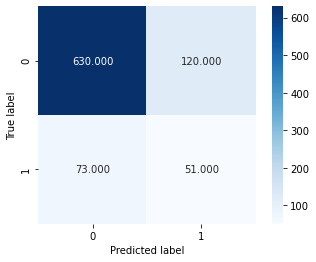

In [54]:
classifier = RandomForestClassifier(bootstrap=True,criterion='entropy',max_features=1,min_samples_leaf=1,n_estimators=200)
classifier.fit(X_train_res,y_train_res)
y_predict= classifier.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, annot_kws={"size":10}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [60]:
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
print("Precision Score : ",precision_score(y_test, y_predict, pos_label='positive',average='micro'))
print("Recall Score : ",recall_score(y_test, y_predict, pos_label='positive',average='micro'))
print("f1 Score : ",f1_score(y_test, y_predict, pos_label='positive',average='micro'))

Precision Score :  0.7791762013729977
Recall Score :  0.7791762013729977
f1 Score :  0.7791762013729977


In [59]:
#Saving The Best Model for Fututre Predictions:
import joblib
joblib.dump(classifier,'classifier.obj')
classifier_from_joblib = joblib.load('classifier.obj')